# Graphs based on Portifolio results

In [ ]:
import pandas as pd

path = "results/bestPortfolios.csv"

records = []
with open(path, "r") as f:
    for line in f.read().splitlines():
        entry = {}
        for token in line.split(";"):
            if not token: continue
            key, val = token.split("=")
            key = key.strip()
            # unify decimal point and strip ‘%’
            num = val.strip().replace(",", ".").rstrip("%")
            entry[key] = float(num)
        records.append(entry)

df = pd.DataFrame(records)
df.head()


,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,NKE,NVDA,PG,SHW,Sharpe,TRV,UNH,V,VZ,WMT
0,10.4,0.3,5.1,3.5,0.1,0.3,7.9,9.6,1.7,4.8,...,0.4,3.0,2.8,1.5,2.382,NaN,NaN,NaN,NaN,NaN
1,2.5,0.1,4.1,1.6,5.7,1.3,13.9,10.3,2.2,9.0,...,1.3,0.2,6.4,NaN,2.581,7.2,NaN,NaN,NaN,NaN
2,4.2,0.6,6.7,2.7,6.8,0.8,8.6,11.0,1.1,8.6,...,4.0,4.0,2.1,NaN,2.532,NaN,2.2,NaN,NaN,NaN
3,17.2,0.8,2.9,1.2,1.2,0.2,6.2,4.8,3.9,15.1,...,0.3,0.8,0.3,NaN,2.784,NaN,NaN,9.2,NaN,NaN
4,4.8,0.7,5.8,1.7,0.5,3.7,7.7,8.8,0.4,3.6,...,0.7,2.4,9.8,NaN,2.505,NaN,NaN,NaN,5.2,NaN


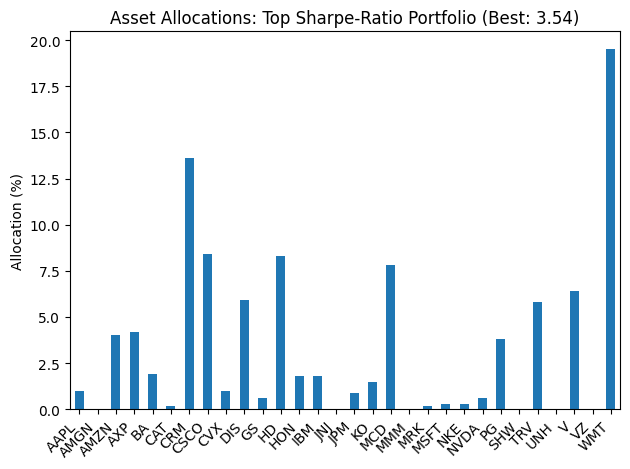

In [ ]:
# Cell 2: Bar chart of weights for the single best‐Sharpe portfolio
import matplotlib.pyplot as plt

best = df.nlargest(1, "Sharpe").iloc[0]
weights = best.drop("Sharpe")

plt.figure()
weights.plot(kind="bar")
plt.title(f"Asset Allocations: Top Sharpe-Ratio Portfolio (Best: {best.Sharpe:.2f})")
plt.ylabel("Allocation (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


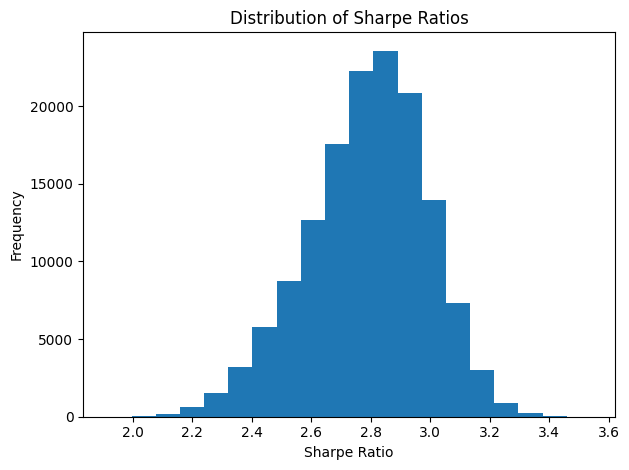

In [8]:
# Cell 3: Histogram of Sharpe ratios across all saved portfolios
plt.figure()
df["Sharpe"].plot(kind="hist", bins=20)
plt.title("Distribution of Sharpe Ratios")
plt.xlabel("Sharpe Ratio")
plt.tight_layout()
plt.show()
